In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [ ]:
import pandas as pd

# Try to read the file, handling bad lines
data = pd.read_csv("/content/creditcard.csv", on_bad_lines='warn')

# If you want to skip bad lines instead of getting warnings:
# data = pd.read_csv("/content/creditcard.csv", on_bad_lines='skip')

Skipping line 3982: expected 31 fields, saw 46



In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(27832, 31)

In [ ]:
# Checking the distribution of two classes in the target variable
data.Class.value_counts()

,count
Class,
0.0,27738
1.0,92


In [ ]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [ ]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

# Get unique values in the target variable
unique_labels = Y.unique()
print(unique_labels)

# Create a complete label mapping
label_mapping = {label: i for i, label in enumerate(unique_labels)} # Dynamically map all labels

Y_numeric = Y.map(label_mapping)

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_numeric, test_size = 0.2, random_state = 0, stratify = Y_numeric)

[ 0.  1. nan]


In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(22265, 30)

 The shape of test dataset :
(5567, 30)


In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
Class
0    22190
1       73
2        2
Name: count, dtype: int64

 Distribution of classes of dependent variable in test :
Class
0    5548
1      19
Name: count, dtype: int64


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_numeric, test_size = 0.2, random_state = 0, stratify = Y_numeric) # Use Y_numeric which has no missing values

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(22265, 30)

 The shape of test dataset :
(5567, 30)


In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
Class
0    22190
1       73
2        2
Name: count, dtype: int64

 Distribution of classes of dependent variable in test :
Class
0    5548
1      19
Name: count, dtype: int64


In [ ]:
# Obtain predictions on the test set
test_preds = classifier.predict(X_test)

# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.7206703910614525

In [ ]:
!pip install sklearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Assuming 'X' is your feature matrix and 'Y_numeric' is your target variable
# ... (Your previous code to load and prepare data)

# Impute missing values in 'X' before splitting
imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y_numeric, test_size = 0.2, random_state = 0, stratify = Y_numeric)

# Hyperparameter tuning
classifier1 = RandomForestClassifier()
grid_values = {'n_estimators': [10, 20], 'max_depth': [3, 5]}
classifier = GridSearchCV(classifier1, param_grid=grid_values, scoring='roc_auc', cv=5)

# Fit the object to train dataset (now with imputed data)
classifier.fit(X_train, Y_train)

# ... (Rest of your code)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [10, 20]},
             scoring='roc_auc')

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

0.9990119020884797

In [ ]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.9994611101131669

In [ ]:
# Calculate predicted probabilities instead of class labels
train_probs =  classifier.predict_proba(X_train)
test_probs  = classifier.predict_proba(X_test)

# Calculate roc_auc score on train set using probabilities
roc_auc_score(Y_train, train_probs, multi_class='ovr')  # Or multi_class='ovo'

0.8950132844234712

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.9210526315789473

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[22189,     1,     0],
       [   19,    54,     0],
       [    2,     0,     0]])

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[5548,    0],
       [   3,   16]])

In [ ]:
import pandas as pd

# Try reading the file with the 'error_bad_lines' parameter set to False to skip bad lines
df = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')

# Print the shape of the DataFrame to see how many rows and columns were read
print(df.shape)

# Inspect the first few and last few rows of the DataFrame to look for anomalies
print(df.head())
print(df.tail())

# If you want to investigate the skipped lines, you can use 'on_bad_lines' with a custom function:
def handle_bad_lines(bad_line):
    print(f"Bad line: {bad_line}")

# Explicitly set the engine to 'python' to allow using a callable for 'on_bad_lines'
df = pd.read_csv('/content/creditcard.csv', on_bad_lines=handle_bad_lines, engine='python')

(286801, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

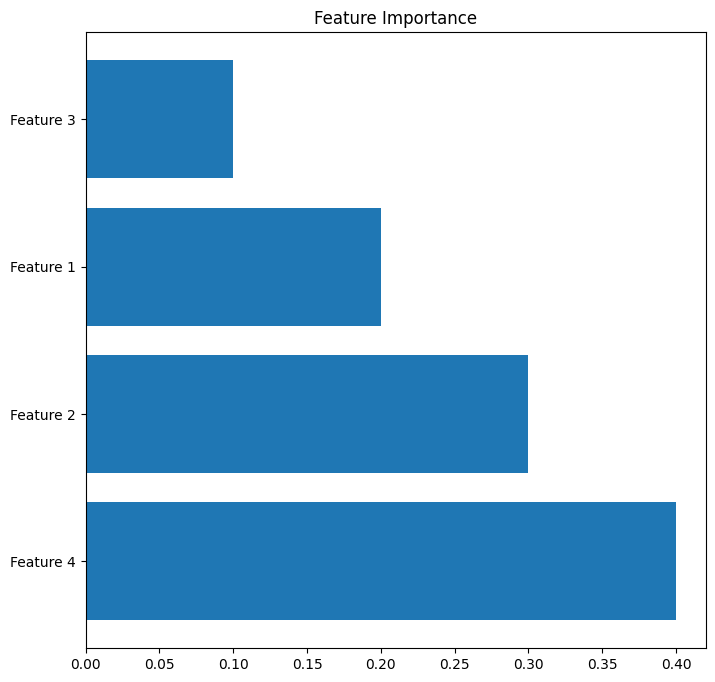

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'importances' and 'features' are defined somewhere earlier in your code
# Replace this with the actual way you calculate feature importances
importances = [0.2, 0.3, 0.1, 0.4]
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']

# Get indices of features sorted by importance
indices = sorted(range(len(importances)), key=importances.__getitem__, reverse=True)
plt.title('Feature Importance')

# Iterate over indices to get corresponding importances
plt.barh(range(len(indices)), [importances[i] for i in indices])

plt.yticks(range(len(indices)), [features[i] for i in indices]) # Add feature names to y-axis
plt.show()